## 1.3.1 图像数组表示

In [1]:
from PIL import Image
import numpy as np

In [4]:
im = np.array(Image.open('../../data/empire.jpg'))
im.shape, im.dtype

((800, 569, 3), dtype('uint8'))

In [5]:
im_L = np.array(Image.open('../../data/empire.jpg').convert('L'), 'f')
im_L.shape, im_L.dtype

((800, 569), dtype('float32'))

In [7]:
value = im[1,2,1]

In [8]:
value

133

In [9]:
im[1,2]

array([ 88, 133, 188], dtype=uint8)

In [11]:
im[:100, :50].sum(axis=2)

array([[409, 403, 403, ..., 397, 400, 397],
       [412, 409, 409, ..., 394, 400, 394],
       [412, 409, 406, ..., 394, 403, 400],
       ...,
       [445, 442, 441, ..., 429, 430, 430],
       [439, 439, 439, ..., 430, 430, 430],
       [442, 442, 442, ..., 430, 429, 429]], dtype=uint64)

## 1.3.2 灰度变换

In [15]:
import matplotlib.pyplot as plt

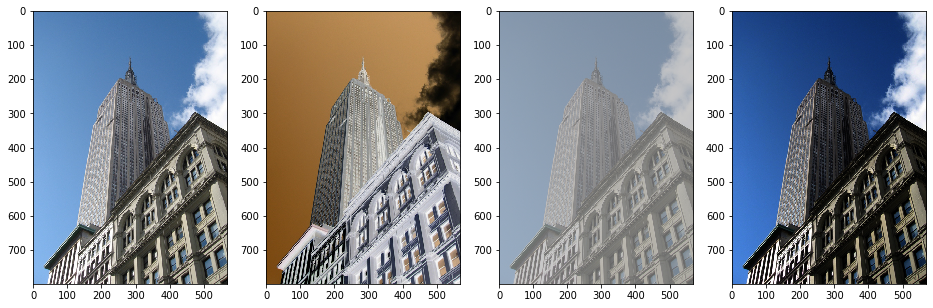

In [49]:
im = np.array(Image.open('../../data/empire.jpg'))
plt.figure(figsize=(16,8))
plt.subplot(1,4,1)
plt.imshow(im)
plt.subplot(1,4,2)
im2 = 255 - im # 对图像进行反向处理
plt.imshow(im2)
plt.subplot(1,4,3)
im3 = (100.0 / 255) * im + 100 # 将图像像素值变换到 100...200 区间
plt.imshow(im3.astype(np.uint8))
plt.subplot(1,4,4)
im4 = 255 * (im / 255) ** 2  # 对图像像素值求平方后得到的图像
plt.imshow(im4.astype(np.uint8))
plt.show()

In [50]:
im.min(), im.max()

(0, 255)

In [51]:
im2.min(), im2.max()

(0, 255)

In [52]:
im3.min(), im3.max()

(100.0, 200.0)

In [53]:
im4.min(), im4.max()

(0.0, 255.0)

In [54]:
pil_im = Image.fromarray(im)

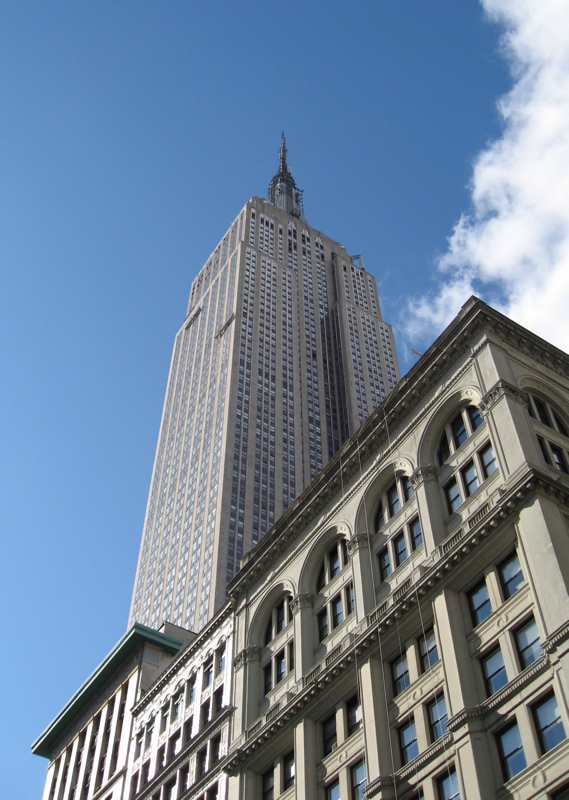

In [55]:
pil_im

In [57]:
pil_im = Image.fromarray(np.uint8(im))

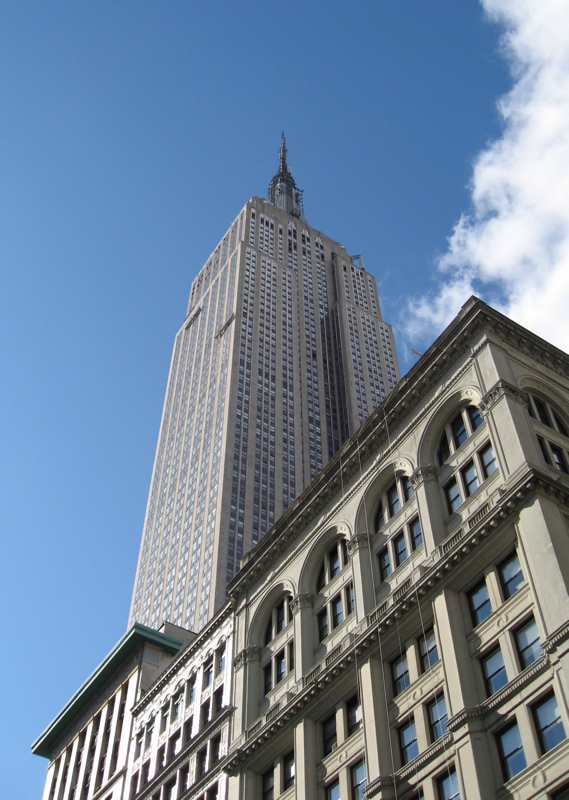

In [59]:
pil_im

## 1.3.3 图像缩放

In [61]:
def imreaize(im, sz):
    """ 使用 PIL 对象重新定义图像数组的大小 """
    pil_im = Image.fromarray(np.uint8(im))
    
    return np.array(pil_im.resize(sz))

## 1.3.4 直方图均衡化

In [64]:
def histeq(im, nbr_bins=256):
    """ 对一幅灰度图像进行直方图均衡化 """
    # 计算图像的直方图
    imhist, bins = np.histogram(im.flatten(), nbr_bins, normed=True)
    cdf = imhist.cumsum() # 累计分布函数，注意是和，不是乘积
    cdf = 255 * cdf / cdf[-1] # 归一化
    
    # 使用累积分布函数的线性插值，计算新的像素值
    im2 = np.interp(im.flatten(), bins[:-1], cdf)
    return im.reshape(im.shape), cdf

In [68]:
a = np.arange(5)
hist, bin_edges = np.histogram(a, bins=2)
hist

array([2, 3])

In [69]:
a

array([0, 1, 2, 3, 4])

In [70]:
bin_edges

array([0., 2., 4.])